In [8]:
#First project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

%matplotlib inline



In [9]:
ds = pd.read_csv("ds_salaries.csv", index_col=0)
ds.head()

#describe data
ds.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


There are 607 records in this dataset
Experience level: senior (SE) is the most common value in this dataset, with 280 records
More than 95% work Full Time
23% of records is Data Scientist
More than half of records is US residence
Mean salary (USD) is 112297 dollar, maximum is 600k and min is 2859$

In [10]:
#Count employment type
print(ds['employment_type'].value_counts())

# Count levels records
print(ds['experience_level'].value_counts())

# Unique job Title
print(ds['job_title'].value_counts())

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer             

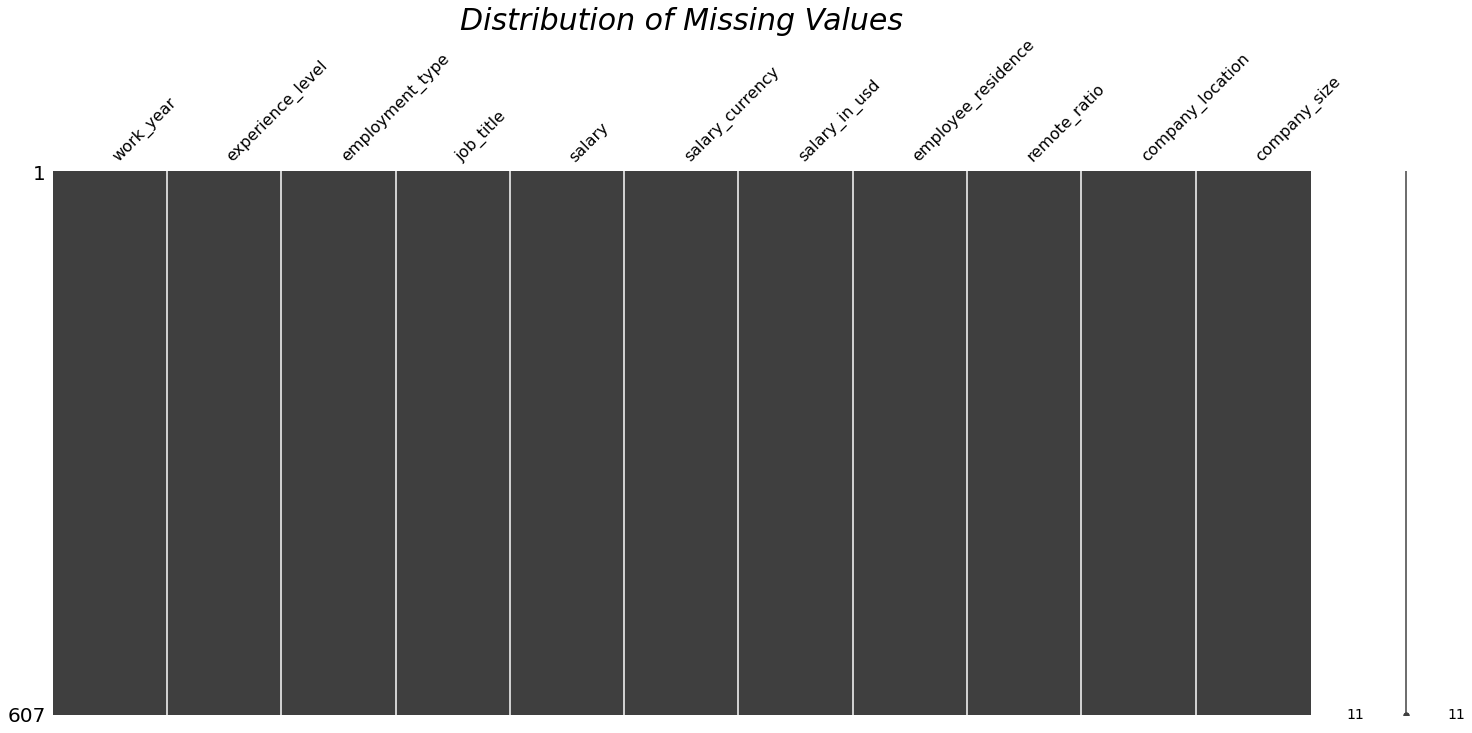

In [11]:
msno.matrix(ds)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique')
plt.show()

In [12]:
labels = ['2020','2021','2022']
# Define color sets of paintings
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)']

fig = px.pie(ds, names='work_year',
             title='Proportion of Working Year',
             color_discrete_sequence=px.colors.sequential.Turbo)

fig.show()

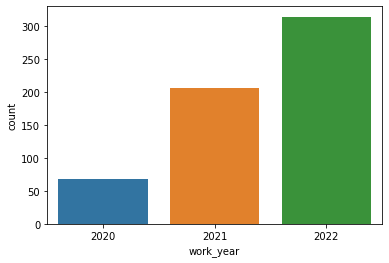

In [14]:
# Employment type
employment_type_of_years = ds.groupby("work_year")["employment_type"].value_counts()
employment_type_of_years

#When group employment type, the difference is in fulltime, the rest do not change much
employment_fulltime = ds[ds['employment_type'] == "FT"]

#Draw the graph
sns.countplot(x=employment_fulltime['work_year'])
plt.show()


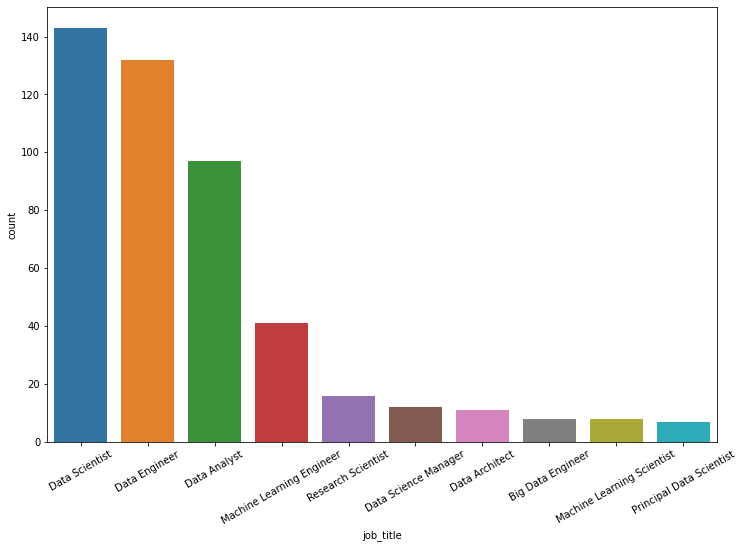

In [70]:
#Job title
job = ds['job_title'].value_counts().rename_axis("job_title").to_frame("count").reset_index()
top_10_popular_jobs = job.nlargest(n=10, columns='count')
top_10_unpopular_jobs = job.nsmallest(n=10, columns='count')

#Plot top 10 popular
plt.figure(figsize=(12,8))
ax = sns.barplot(data = top_10_popular_jobs, x='job_title', y='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.show()